In [1]:
# ---
# title: 05. Modern Portfolio Theory (MPT) Foundations
# tags: [Finance, Math, Numpy]
# difficulty: Intermediate
# ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
processed_path = Path("../data/silver")
returns_file = max(list(processed_path.glob("market_returns_*.parquet")), key=lambda f: f.stat().st_mtime)
df_returns = pd.read_parquet(returns_file)

print(f"Loaded returns for {len(df_returns.columns)} tickers.")

Loaded returns for 54 tickers.


# Modern Portfolio Theory (MPT) 101

MPT, introduced by Harry Markowitz in 1952, revolutionized finance by mathematically defining **Risk** and **diversification**.

### Key Concepts
1. **Expected Return** ($\mu$): The mean of historical returns.
2. **Risk** ($\sigma$): The standard deviation (volatility) of returns.
3. **Covariance** ($\Sigma$): How assets move together.

The goal is not to maximize return, but to maximize return **per unit of risk**.

/var/folders/3l/_1hm2x590s5_n6d4pzvq1v800000gn/T/ipykernel_82178/441731885.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if volatility[i] > 0.4 or mean_returns[i] > 0.4:
/var/folders/3l/_1hm2x590s5_n6d4pzvq1v800000gn/T/ipykernel_82178/441731885.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (volatility[i], mean_returns[i]))


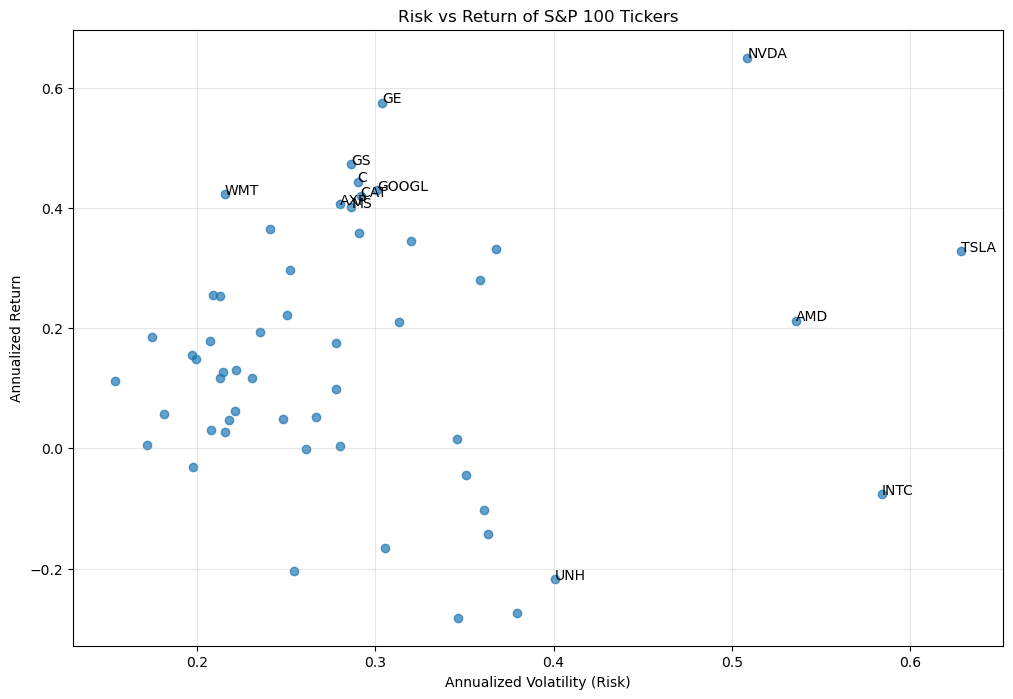

In [2]:
# 1. Calculate Mean Returns (Annualized)
# We assume 252 trading days in a year
mean_returns = df_returns.mean() * 252

# 2. Calculate Volatility (Annualized)
volatility = df_returns.std() * np.sqrt(252)

# Plot Risk vs Return
plt.figure(figsize=(12, 8))
plt.scatter(volatility, mean_returns, alpha=0.7)

for i, txt in enumerate(df_returns.columns):
    # Annotate some points
    if volatility[i] > 0.4 or mean_returns[i] > 0.4:
        plt.annotate(txt, (volatility[i], mean_returns[i]))
        
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Risk vs Return of S&P 100 Tickers')
plt.grid(True, alpha=0.3)
plt.show()

### The Covariance Matrix

Risk is not additive. If you hold two stocks that move in opposite directions, your total risk is **lower** than the average risk of the two.

This is calculated via the Covariance Matrix $\Sigma$.

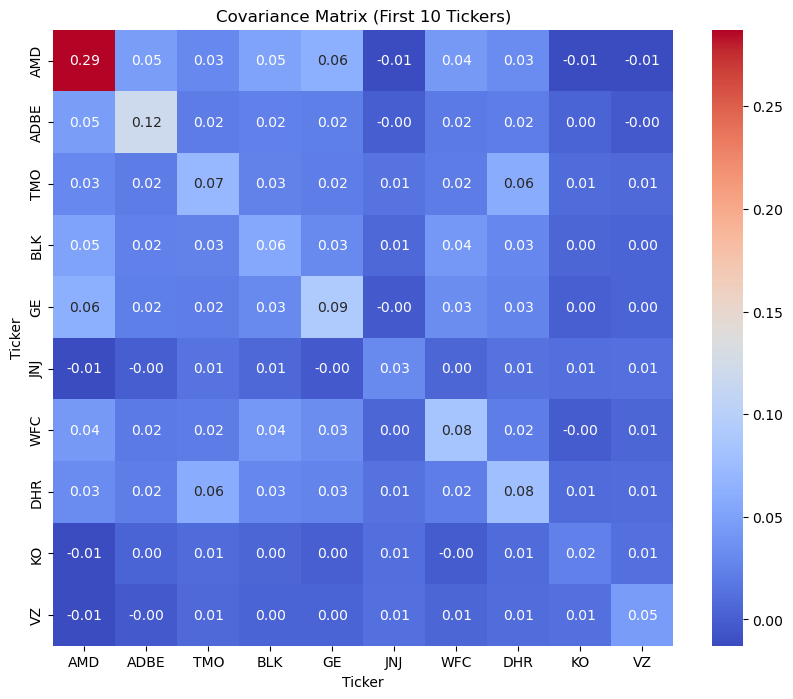

In [3]:
# 3. Covariance Matrix
cov_matrix = df_returns.cov() * 252

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix (First 10 Tickers)')
plt.show()